### Program - Visualize Histogram Equalization Of Color Images

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------

from skimage.io import imread
from skimage import img_as_float
from skimage import exposure, color
from skimage.transform import resize

### Visualization Function -  Contrast Limited Adaptive Histogram Equalization (CLAHE) 

Adaptive Histogram Equalization (AHE) is a computer image processing technique used to improve contrast in images. It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

However, AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. A variant of adaptive histogram equalization called contrast limited adaptive histogram equalization (CLAHE) prevents this by limiting the amplification.

Reference - https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

In [2]:
def image_contrast_adjusment(img):

    # Convert pixel intensities to float value
    img_start = img_as_float(img)

    #Transorm image to HSV color spaace
    img_hsv = color.rgb2hsv(img_start)

    #Retrieve the value/brightness componenet of image
    brightness = img_hsv[:,:,2]

    # Apply CLAHE algorithm on brighntess component of image to adjust image contrast 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        b_adapteq = exposure.equalize_adapthist(brightness, clip_limit=0.03, nbins=48)

    # Restore brighntess component subject to CLAHE to original HSV color space
    img_hsv[:,:,2] = b_adapteq

    # Convert image from HSV to RGB color space
    img_end = color.hsv2rgb(img_hsv)

    # Initialize size of image 
    img_size = np.shape(img)[0]

    # Visualiize image in different color spaces at different stages of image preprocessing
    plt.figure(figsize=(14, 7))

    plt.subplot(131)
    plt.imshow(img_start)
    plt.title("Initial Image")
    plt.xticks([0,img_size//2,img_size-1])
    plt.yticks([0,img_size//2,img_size-1])

    plt.subplot(132)
    plt.imshow(img_hsv)
    plt.title("HSV Image")
    plt.xticks([0,img_size//2,img_size-1])
    plt.yticks([0,img_size//2,img_size-1])

    plt.subplot(133)
    plt.imshow(img_end)
    plt.title("Convereted Image")
    plt.xticks([0,img_size//2,img_size-1])
    plt.yticks([0,img_size//2,img_size-1])

    plt.tight_layout()
    plt.show()

### Visualize Images - Before and After CLAHE 

In [3]:
# Load image of Dog
x_dog = imread("Dog.jpg")

# Resize image of Dog
x_dog = resize(x_dog, (200, 200), mode='reflect')

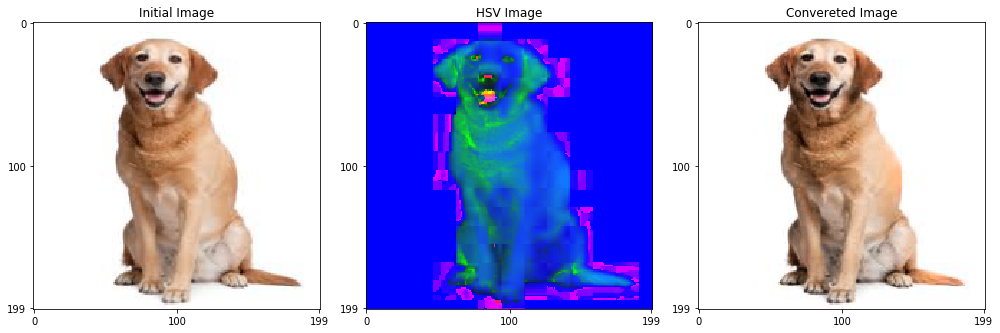

In [4]:
# Visualize effects of CLAHE Algorithm on image
image_contrast_adjusment(x_dog)

In [5]:
# Load Image of Cat
x_cat = imread("Cat.jpg")

# Resize image of Cat
x_cat = resize(x_cat, (200, 200), mode='reflect')

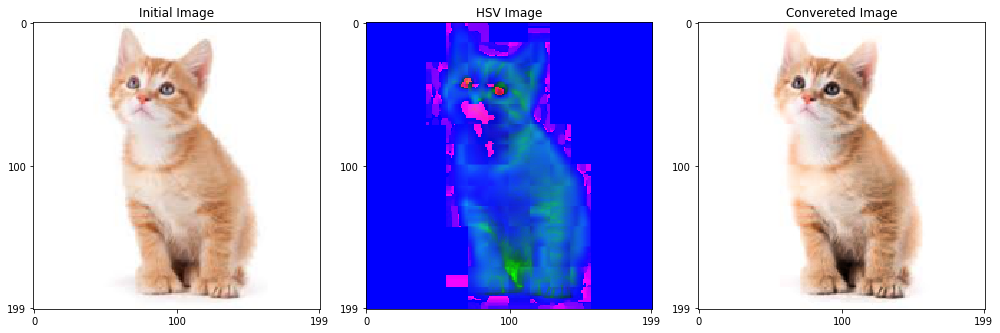

In [6]:
# Visualize effects of CLAHE Algorithm on image
image_contrast_adjusment(x_cat)

### Reference

http://scikit-image.org/docs/dev/api/skimage.color.html                                                             
http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize                               
http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist